In [6]:
#import libraries
import tensorflow as tf
from scipy.io import loadmat
import matplotlib.pyplot as plt
import random
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, BatchNormalization, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
import pandas as pd

In [7]:
#load data
train = loadmat("train_32x32.mat")
test = loadmat("test_32x32.mat")

X_train = train["X"].T
X_test = test["X"].T
y_train = train["y"]
y_test = test["y"]

#### Data Preprocessing

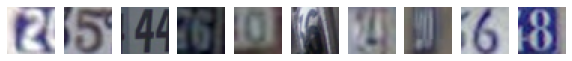

In [8]:
#visualize sample data
figure, axes = plt.subplots(1, 10, figsize = (10, 1))
for i in range(10):
    axes[i].imshow(random.choice(X_train).T)
    axes[i].set_axis_off()

In [9]:
# transform data to binary scale
X_train_gs = np.mean(X_train, axis=1)
X_test_gs = np.mean(X_test, axis=1)

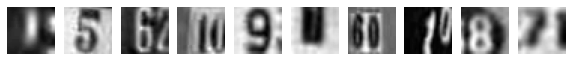

In [10]:
#visualize sample data
figure, axes = plt.subplots(1, 10, figsize = (10, 1))
for i in range(10):
    axes[i].imshow(random.choice(X_train_gs).T, cmap = plt.cm.binary)
    axes[i].set_axis_off()

#### MLP neural network classifier

In [31]:
model = Sequential([
    Flatten(input_shape = (32,32)),
    Dense(256, activation = 'relu'),
    Dense(128, activation = 'relu'),
    Dense(128, activation = 'relu'),
    Dense(11, activation = 'softmax')
])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 256)               262400    
_________________________________________________________________
dense_21 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_22 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_23 (Dense)             (None, 11)                1419      
Total params: 313,227
Trainable params: 313,227
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [33]:
checkpoint_path = 'SVHN Dataset/checkpoints/checkpoint_{epoch:02d}'
checkpoint = ModelCheckpoint(filepath = checkpoint_path, frequency = 'epoch', save_weights_only = True, verbose = 0 )
csvlogger = CSVLogger("SVHN Dataset/results.csv")

In [34]:
history = model.fit(X_train_gs, y_train, validation_data = (X_test_gs, y_test), epochs = 30, verbose =1, callbacks = [checkpoint, csvlogger])

Epoch 1/30
2290/2290 [==============================] - 17s 7ms/step - loss: 3.6628 - accuracy: 0.2566 - val_loss: 1.6959 - val_accuracy: 0.4570
Epoch 2/30
2290/2290 [==============================] - 16s 7ms/step - loss: 1.5552 - accuracy: 0.4945 - val_loss: 1.5148 - val_accuracy: 0.5276
Epoch 3/30
2290/2290 [==============================] - 15s 6ms/step - loss: 1.3921 - accuracy: 0.5529 - val_loss: 1.5109 - val_accuracy: 0.5239
Epoch 4/30
2290/2290 [==============================] - 15s 6ms/step - loss: 1.3082 - accuracy: 0.5836 - val_loss: 1.4214 - val_accuracy: 0.5727
Epoch 5/30
2290/2290 [==============================] - 15s 7ms/step - loss: 1.2451 - accuracy: 0.6054 - val_loss: 1.7442 - val_accuracy: 0.4695
Epoch 6/30
2290/2290 [==============================] - 15s 7ms/step - loss: 1.1986 - accuracy: 0.6218 - val_loss: 1.2633 - val_accuracy: 0.6087
Epoch 7/30
2290/2290 [==============================] - 15s 7ms/step - loss: 1.1637 - accuracy: 0.6342 - val_loss: 1.3173 - val_ac

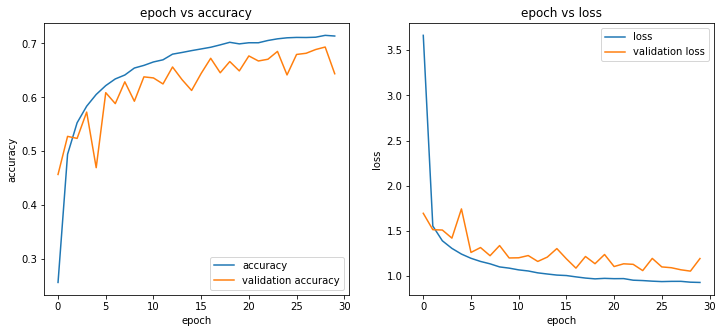

In [35]:
df = pd.DataFrame(history.history)
fig, axes = plt.subplots(1,2, figsize = (12, 5))
axes[0].plot(df.accuracy, label = "accuracy")
axes[0].plot(df.val_accuracy, label = 'validation accuracy')
axes[0].legend()
axes[0].set_title('epoch vs accuracy')
axes[0].set_xlabel('epoch')
axes[0].set_ylabel('accuracy')

axes[1].plot(df.loss, label = "loss")
axes[1].plot(df.val_loss, label = 'validation loss')
axes[1].legend()
axes[1].set_title('epoch vs loss')
axes[1].set_xlabel('epoch')
axes[1].set_ylabel('loss')

plt.show()

In [36]:
model.evaluate(X_test_gs, y_test)

814/814 [==============================] - 2s 3ms/step - loss: 1.1957 - accuracy: 0.6438


[1.1957284212112427, 0.643822968006134]

#### CNN neural network classifier

In [37]:
X_train_tr = np.zeros([73257,32,32,3])
for i in range(X_train.shape[0]):
    X_train_tr[i] = X_train[i].T

X_test_tr = np.zeros([26032,32,32,3])
for i in range(X_test.shape[0]):
    X_test_tr[i] = X_test[i].T

In [38]:
X_train_tr = X_train_tr/255.0
X_test_tr = X_test_tr/255.0

In [103]:
model = Sequential([
    Conv2D(filters = 8, kernel_size = 3, padding = "SAME", activation = "relu", input_shape = (32, 32, 3,) ),
    MaxPool2D(pool_size = 2),
    Conv2D(filters = 16, kernel_size = 3, padding = "SAME", activation = "relu"),
    MaxPool2D(pool_size = 2),
    Flatten(),
    Dense(32, activation = "relu"),
    Dense(32, activation = "relu"),
    Dense(11, activation = "softmax")
])

In [104]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 8)         224       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 16)        1168      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 1024)              0         
_________________________________________________________________
dense_62 (Dense)             (None, 32)                32800     
_________________________________________________________________
dense_63 (Dense)             (None, 32)              

In [108]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [109]:
checkpoint_path = 'SVHN Dataset/checkpoints_CNN/checkpoint_{epoch:02d}'
checkpoint = ModelCheckpoint(filepath = checkpoint_path, frequency = 'epoch', save_weights_only = True, verbose = 0 )
csvlogger = CSVLogger("SVHN Dataset/results_CNN.csv")

In [107]:
history = model.fit(X_train_tr, y_train, validation_data = (X_test_tr, y_test), epochs = 30, verbose =1, callbacks = [checkpoint, csvlogger])

Epoch 1/30
2290/2290 [==============================] - 102s 42ms/step - loss: 1.2612 - accuracy: 0.5817 - val_loss: 0.7604 - val_accuracy: 0.7823
Epoch 2/30
2290/2290 [==============================] - 54s 24ms/step - loss: 0.6144 - accuracy: 0.8225 - val_loss: 0.6583 - val_accuracy: 0.8101
Epoch 3/30
2290/2290 [==============================] - 54s 24ms/step - loss: 0.5350 - accuracy: 0.8430 - val_loss: 0.6027 - val_accuracy: 0.8230
Epoch 4/30
2290/2290 [==============================] - 54s 24ms/step - loss: 0.4862 - accuracy: 0.8559 - val_loss: 0.5557 - val_accuracy: 0.8352
Epoch 5/30
2290/2290 [==============================] - 55s 24ms/step - loss: 0.4493 - accuracy: 0.8662 - val_loss: 0.5158 - val_accuracy: 0.8510
Epoch 6/30
2290/2290 [==============================] - 55s 24ms/step - loss: 0.4236 - accuracy: 0.8736 - val_loss: 0.5026 - val_accuracy: 0.8522
Epoch 7/30
2290/2290 [==============================] - 55s 24ms/step - loss: 0.4023 - accuracy: 0.8800 - val_loss: 0.5125 

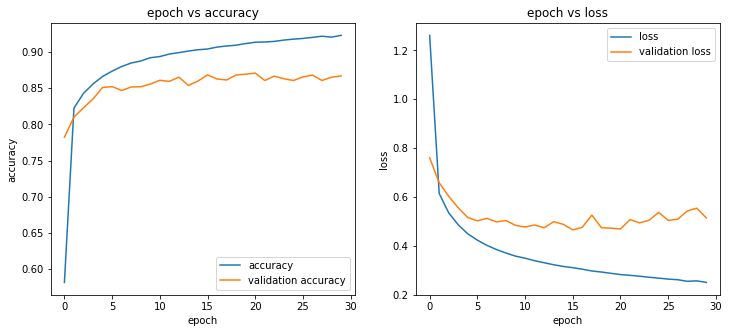

In [110]:
df = pd.DataFrame(history.history)
fig, axes = plt.subplots(1,2, figsize = (12, 5))
axes[0].plot(df.accuracy, label = "accuracy")
axes[0].plot(df.val_accuracy, label = 'validation accuracy')
axes[0].legend()
axes[0].set_title('epoch vs accuracy')
axes[0].set_xlabel('epoch')
axes[0].set_ylabel('accuracy')

axes[1].plot(df.loss, label = "loss")
axes[1].plot(df.val_loss, label = 'validation loss')
axes[1].legend()
axes[1].set_title('epoch vs loss')
axes[1].set_xlabel('epoch')
axes[1].set_ylabel('loss')

plt.show()

In [45]:
model.evaluate(X_test_tr, y_test)

814/814 [==============================] - 5s 5ms/step - loss: 0.5271 - accuracy: 0.8605


[0.5271427035331726, 0.8604794144630432]

#### Get model predictions

In [80]:
model_MLP = Sequential([
    Flatten(input_shape = (32,32)),
    Dense(256, activation = 'relu'),
    Dense(128, activation = 'relu'),
    Dense(128, activation = 'relu'),
    Dense(11, activation = 'softmax')
])

model_MLP.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

latest = tf.train.latest_checkpoint('SVHN Dataset/checkpoints')
model_MLP.load_weights(latest)

loss, accuracy = model_MLP.evaluate(X_test_gs, y_test, verbose=0)
print("Loss : {}\nAccuracy: {}".format(loss,accuracy))

Loss : 1.1957284212112427
Accuracy: 0.643822968006134


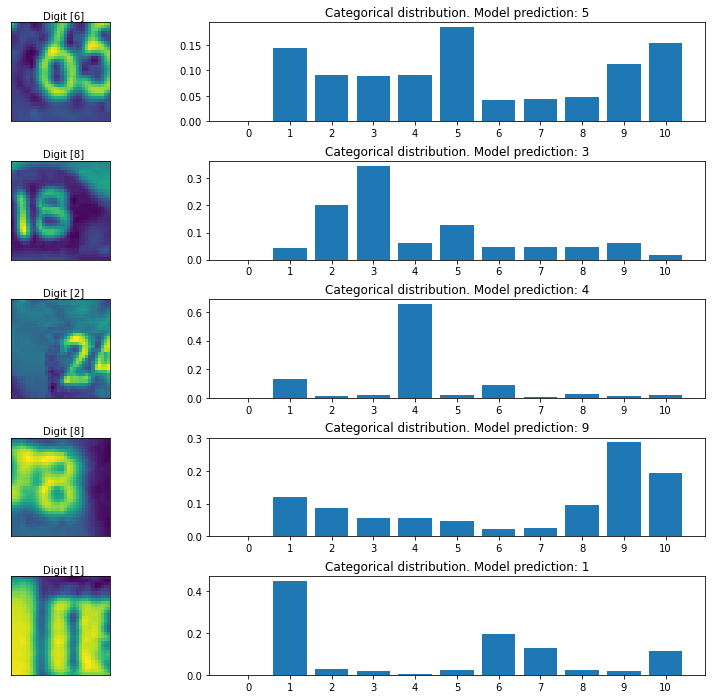

In [94]:
#get model predictions on randomly selected test images
num_test_images = X_test_gs.shape[0]

random_inx = np.random.choice(num_test_images, 5)
random_test_images = X_test_gs[random_inx, ...]
random_test_labels = y_test[random_inx, ...]

predictions = model_MLP.predict(random_test_images)

fig, axes = plt.subplots(5, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)

for i, (prediction, image, label) in enumerate(zip(predictions, random_test_images, random_test_labels)):
    axes[i, 0].imshow(np.squeeze(image.T))
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(10., -1.5, f'Digit {label}')
    axes[i, 1].bar(np.arange(len(prediction)), prediction)
    axes[i, 1].set_xticks(np.arange(len(prediction)))
    axes[i, 1].set_title(f"Categorical distribution. Model prediction: {np.argmax(prediction)}")
    
plt.show()

In [79]:
model_CNN = Sequential([
    Conv2D(filters = 8, kernel_size = 3, padding = "SAME", activation = "relu", input_shape = (32, 32, 3,) ),
    MaxPool2D(pool_size = 2),
    Conv2D(filters = 16, kernel_size = 3, padding = "SAME", activation = "relu"),
    MaxPool2D(pool_size = 2),
    Flatten(),
    Dense(32, activation = "relu"),
    Dense(32, activation = "relu"),
    Dense(11, activation = "softmax")
])
model_CNN.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

latest = tf.train.latest_checkpoint('SVHN Dataset/checkpoints_CNN')
model_CNN.load_weights(latest)
loss, accuracy = model_CNN.evaluate(X_test_tr, y_test, verbose=0)
print("Loss : {}\nAccuracy: {}".format(loss,accuracy))

Loss : 0.5271427035331726
Accuracy: 0.8604794144630432


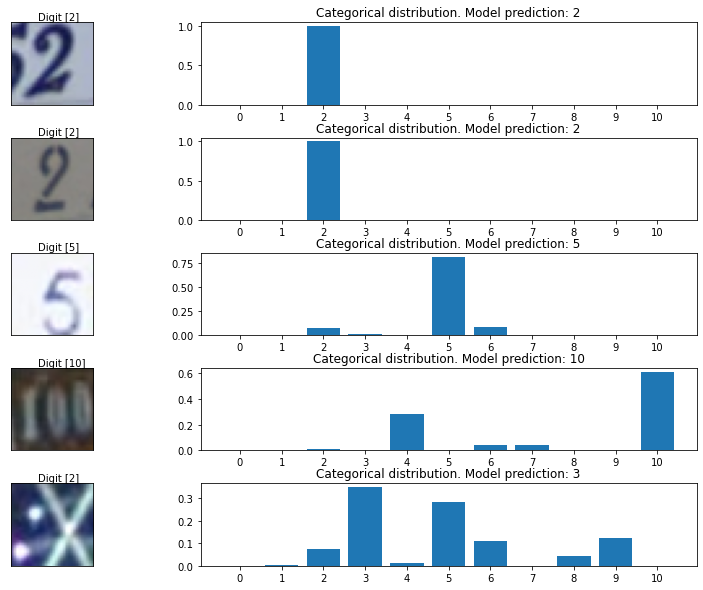

In [102]:
#get model predictions on randomly selected test images
num_test_images = X_test_tr.shape[0]

random_inx = np.random.choice(num_test_images, 5)
random_test_images = X_test_tr[random_inx, ...]
random_test_labels = y_test[random_inx, ...]

predictions = model_CNN.predict(random_test_images)

fig, axes = plt.subplots(5, 2, figsize=(16, 10))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)

for i, (prediction, image, label) in enumerate(zip(predictions, random_test_images, random_test_labels)):
    axes[i, 0].imshow(np.squeeze(image))
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(10., -1.5, f'Digit {label}')
    axes[i, 1].bar(np.arange(len(prediction)), prediction)
    axes[i, 1].set_xticks(np.arange(len(prediction)))
    axes[i, 1].set_title(f"Categorical distribution. Model prediction: {np.argmax(prediction)}")
    
plt.show()